In [1]:
%matplotlib inline
import sys
sys.path.append("..")

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.tablogger import TabLogger

In [3]:
# load the file from the experiments directories

df = pd.DataFrame({})
for mr in (1, 2, 10, 20, 40):    
    fpath = os.path.join(
        "..",
        "experiments",
        "joint_kd_prune-cifar100-vgg19_bn_mr{}".format(mr),
        "out",
        "epoch.out"
    )
    tlog = TabLogger(fpath, resume=True)
    tlog.close()

    # add the run column to the data dictionary
    dd = tlog.numbers
    dd["Mask Regularizer"] = ["MR{}".format(mr)] * len(list(dd.values())[0])

    # concat the dataframe
    df = pd.concat([df, pd.DataFrame(dd)])

In [4]:
print(df)

     Epoch  Train Task Loss  Train KD Loss  Train Mask Loss  Train Acc  \
0      0.0         0.556921       0.346861         0.963310     98.292   
1      1.0         0.722819       0.423807         0.922206     97.786   
2      2.0         0.746435       0.444912         0.896386     97.660   
3      3.0         0.686398       0.438933         0.873903     97.850   
4      4.0         0.720339       0.439215         0.857743     97.756   
..     ...              ...            ...              ...        ...   
159  159.0         6.342145       2.252508        13.954366     81.382   
160  160.0         6.298570       2.242812        13.968870     81.236   
161  161.0         6.364732       2.258621        13.974706     81.092   
162  162.0         6.403175       2.254142        13.979062     81.042   
163  163.0         6.356171       2.254375        13.952197     81.190   

     Eval Task Loss  Eval KD Loss  Eval Mask Loss  Eval Acc      LR  \
0         16.147886      0.554198       

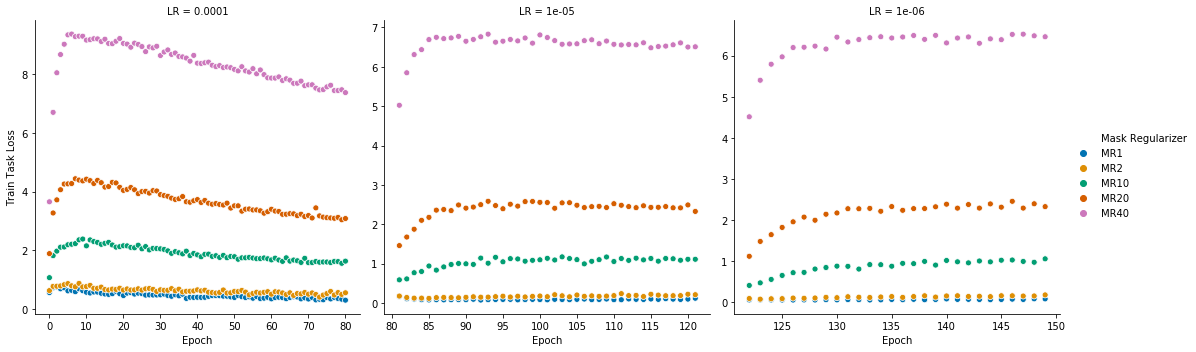

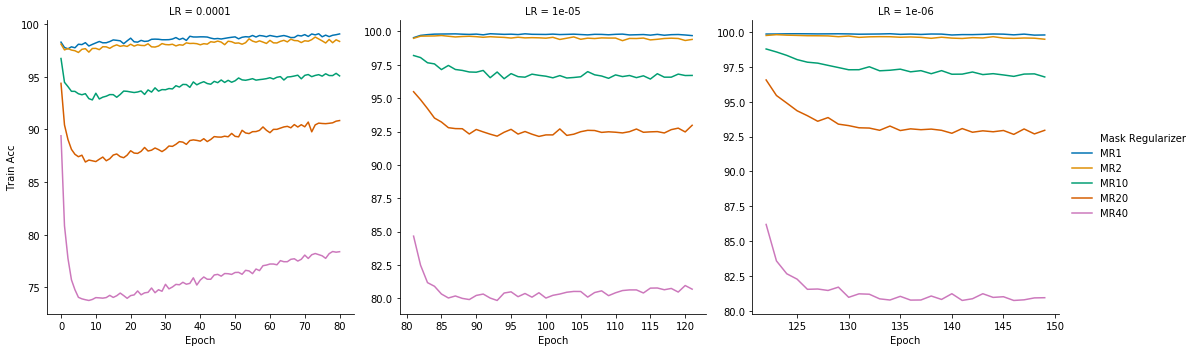

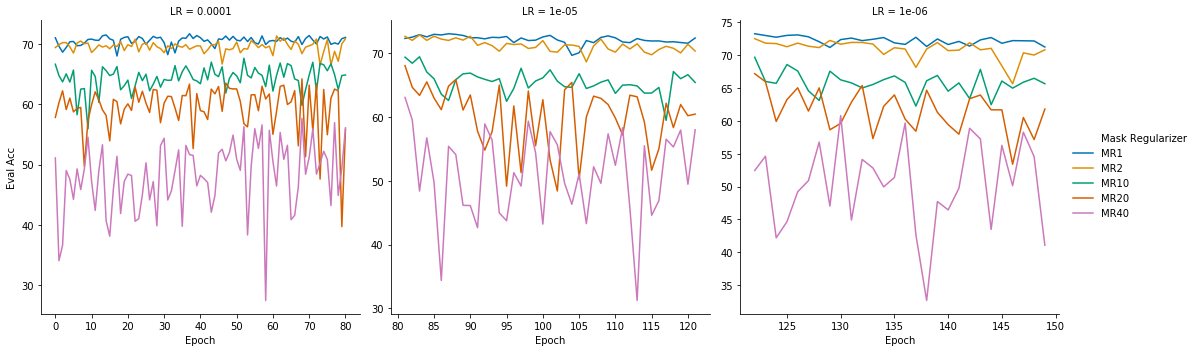

In [7]:
# plot in Seaborn
# plt.figure(figsize=(15, 6))


tl = sns.relplot(
    x="Epoch", y="Train Task Loss", hue="Mask Regularizer", data=df,
    col_order=[0.0001, 0.00001, 0.000001], kind="scatter", palette="colorblind",
    col="LR", facet_kws=dict(sharex=False, sharey=False),
)
# plt.savefig("train_loss-cifar100-vgg19_bn-full.png", dpi=200)
plt.show()
ta = sns.relplot(
    x="Epoch", y="Train Acc", hue="Mask Regularizer", data=df,
    col_order=[0.0001, 0.00001, 0.000001], kind="line", palette="colorblind",
    col="LR", facet_kws=dict(sharex=False, sharey=False),
)
# plt.savefig("train_acc-cifar100-vgg19_bn-full.png", dpi=200)
plt.show()
ea = sns.relplot(
    x="Epoch", y="Eval Acc", hue="Mask Regularizer", data=df,
    col_order=[0.0001, 0.00001, 0.000001], kind="line", palette="colorblind",
    col="LR", facet_kws=dict(sharex=False, sharey=False),
)
# g.set_yscale("log")
# plt.savefig("eval_acc-cifar100-vgg19_bn-full.png", dpi=200)
plt.show()

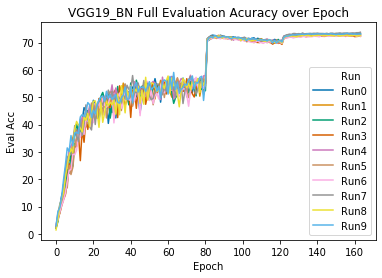

In [51]:
ea = sns.lineplot(
    x="Epoch", y="Eval Acc", hue="Run", data=df,
    palette="colorblind"
)
ea.set(title="VGG19_BN Full Evaluation Acuracy over Epoch")
plt.savefig("eval_acc-cifar100-vgg19_bn-full-nofacet.png", dpi=200)
# g.set_yscale("log")
plt.show()